<a href="https://colab.research.google.com/github/JairoQuelal/AutoGPT/blob/master/Energy_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Dataset

In [3]:
import pandas as pd

df = pd.read_csv('Renewable.csv')



                       Time  Energy delta[Wh]   GHI  temp  pressure  humidity  \
0       2017-01-01 00:00:00                 0   0.0   1.6      1021       100   
1       2017-01-01 00:15:00                 0   0.0   1.6      1021       100   
2       2017-01-01 00:30:00                 0   0.0   1.6      1021       100   
3       2017-01-01 00:45:00                 0   0.0   1.6      1021       100   
4       2017-01-01 01:00:00                 0   0.0   1.7      1020       100   
...                     ...               ...   ...   ...       ...       ...   
196771  2022-08-31 16:45:00               118  23.7  18.6      1023        57   
196772  2022-08-31 17:00:00                82  15.6  18.5      1023        61   
196773  2022-08-31 17:15:00                51   8.0  18.5      1023        61   
196774  2022-08-31 17:30:00                24   2.1  18.5      1023        61   
196775  2022-08-31 17:45:00                 0   0.0  18.5      1023        61   

        wind_speed  rain_1h

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={"axes.facecolor":"Beige" , "axes.grid" : False})

import warnings
warnings.filterwarnings("ignore")

In [4]:
print("From Time : ",df['Time'].min())
print("To Time   : ",df['Time'].max())

From Time :  2017-01-01 00:00:00
To Time   :  2022-08-31 17:45:00


In [5]:
df['Time'] = pd.to_datetime(df['Time'])
df.head()

Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0 2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1 2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2 2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3 2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4 2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0                     0.0             4     0      1  
1                     0.0             4     0      1  
2                     0.0             4     0      1  
3                     0.0             4     0      1  
4                     0.0             4     1      1

In [6]:
df = df[df['Energy delta[Wh]'] != 0]
df.head()

Time  Energy delta[Wh]   GHI  temp  pressure  humidity  \
32 2017-01-01 08:00:00                 5  10.6   3.5      1016        99   
33 2017-01-01 08:15:00                33   6.0   3.5      1016        99   
34 2017-01-01 08:30:00                44   2.8   3.5      1016        99   
35 2017-01-01 08:45:00                61   3.1   3.5      1016        99   
36 2017-01-01 09:00:00                65   3.5   3.6      1016        97   

    wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
32         6.0      0.0      0.0          98      1            60        450   
33         6.0      0.0      0.0          98      1            75        450   
34         6.0      0.0      0.0          98      1            90        450   
35         6.0      0.0      0.0          98      1           105        450   
36         6.2      0.0      0.0         100      1           120        450   

    SunlightTime/daylength  weather_type  hour  month  
32                    0.13             4     8      1  
33                    0.17             4     8      1  
34                    0.20             4     8      1  
35                    0.23             4     8      1  
36                    0.27             4     9      1

**Exploratory Data Analysis (EDA) and Visualization**

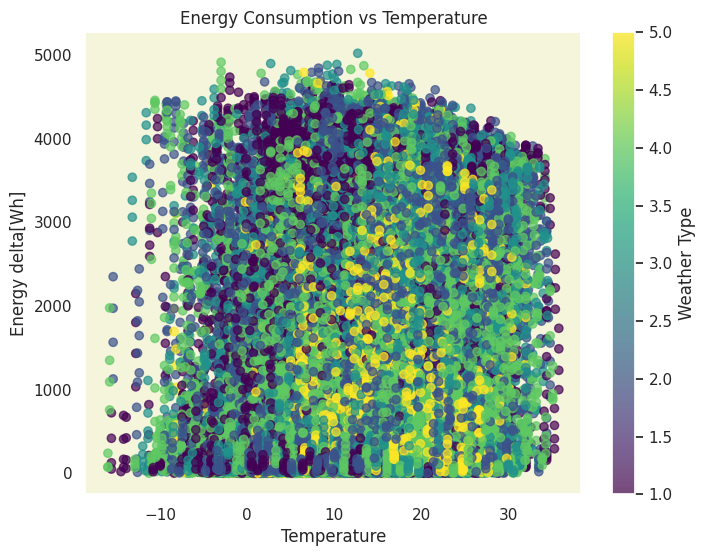

In [15]:
# @title Energy Consumption vs Temperature

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['temp'], df['Energy delta[Wh]'], c=df['weather_type'], cmap='viridis', alpha=0.7)
plt.xlabel('Temperature')
plt.ylabel('Energy delta[Wh]')
plt.title('Energy Consumption vs Temperature')
_ = plt.colorbar(label='Weather Type')

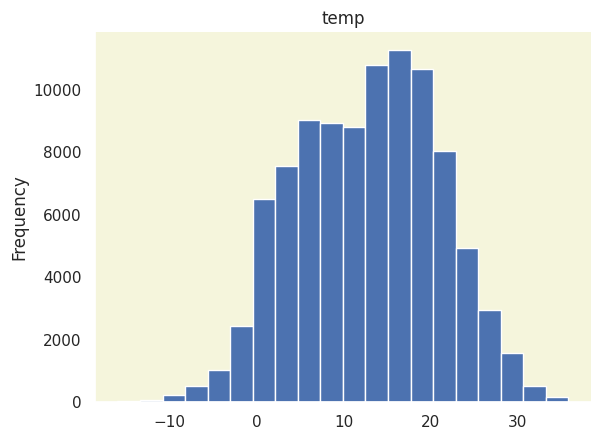

In [12]:
# @title temp

from matplotlib import pyplot as plt
df['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

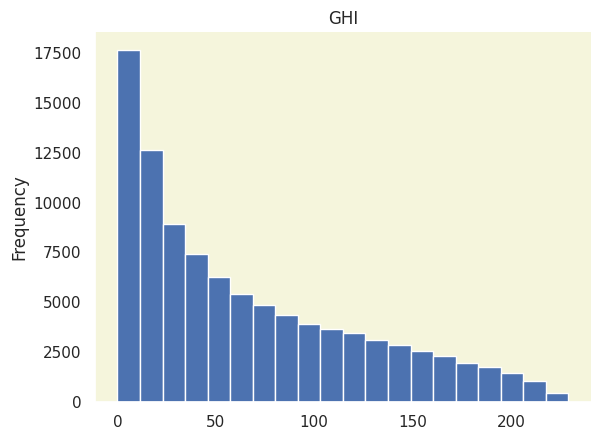

In [11]:
# @title GHI

from matplotlib import pyplot as plt
df['GHI'].plot(kind='hist', bins=20, title='GHI')
plt.gca().spines[['top', 'right',]].set_visible(False)

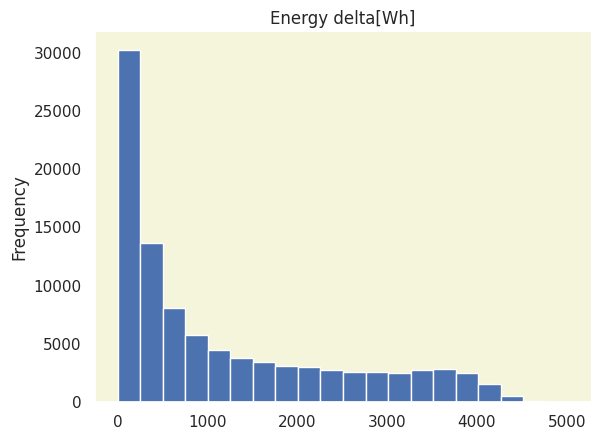

In [10]:
# @title Energy delta[Wh]

from matplotlib import pyplot as plt
df['Energy delta[Wh]'].plot(kind='hist', bins=20, title='Energy delta[Wh]')
plt.gca().spines[['top', 'right',]].set_visible(False)

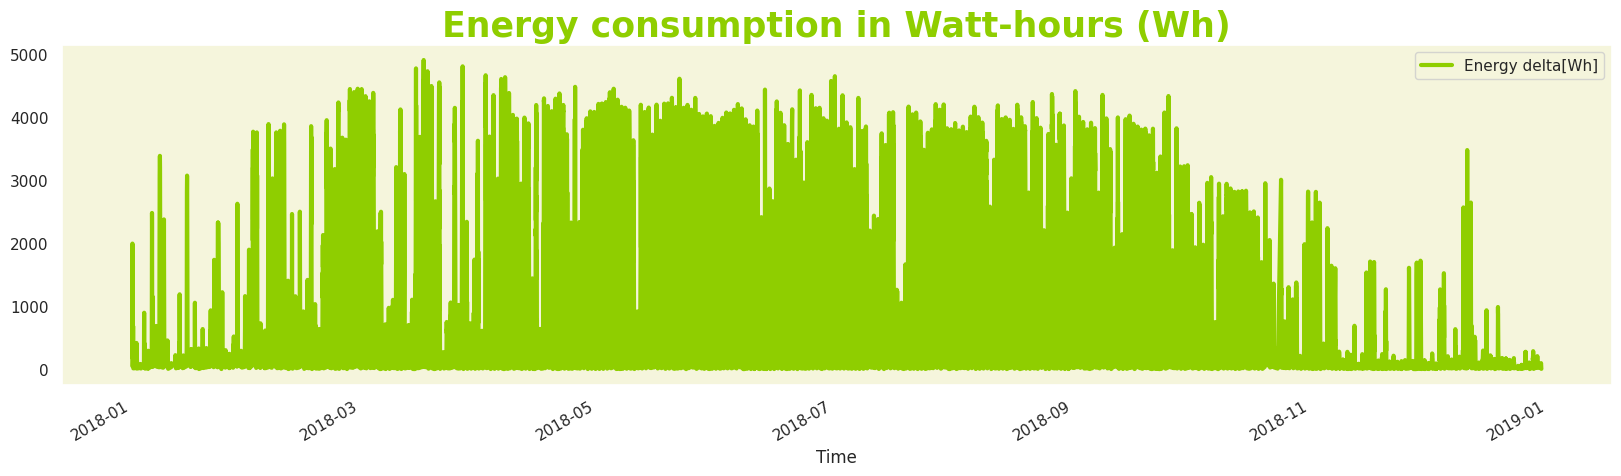

In [14]:
df1 = df[['Time','Energy delta[Wh]']].copy('Deep')
df1 = df1.set_index('Time')
df_2018 = df1[(df1.index >= '2018-01-01') & (df1.index < '2018-12-31')]
df_2018.plot(figsize=(20,5), lw=3,color = '#8FCE00')
plt.title('Energy consumption in Watt-hours (Wh)', weight='bold', fontsize=25,color = '#8FCE00');

In [29]:
# Create lists for categorical and numeric columns
cat_cols = []
num_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_cols.append(column)
    elif pd.api.types.is_object_dtype(df[column]):
        cat_cols.append(column)

print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_cols)}', num_cols)

Categorical columns: 0 []
Numeric columns: 16 ['Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun', 'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type', 'hour', 'month']


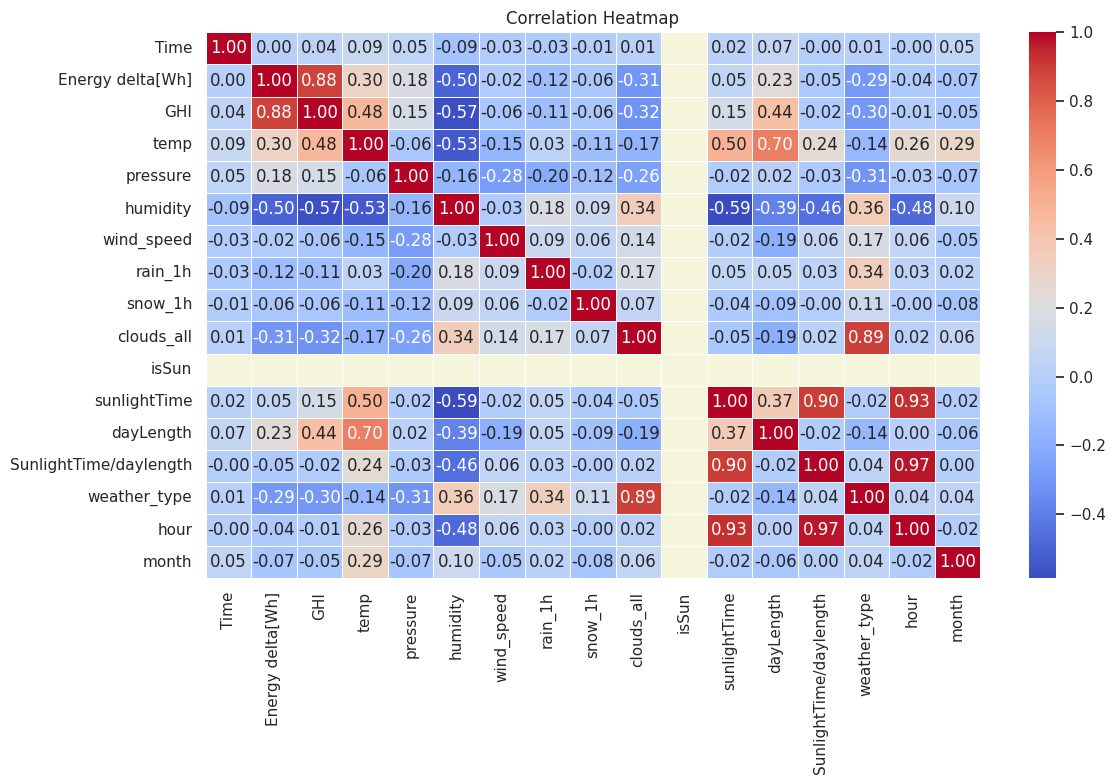

In [32]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(12, 8))
sb.heatmap(df.drop(cat_cols, axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

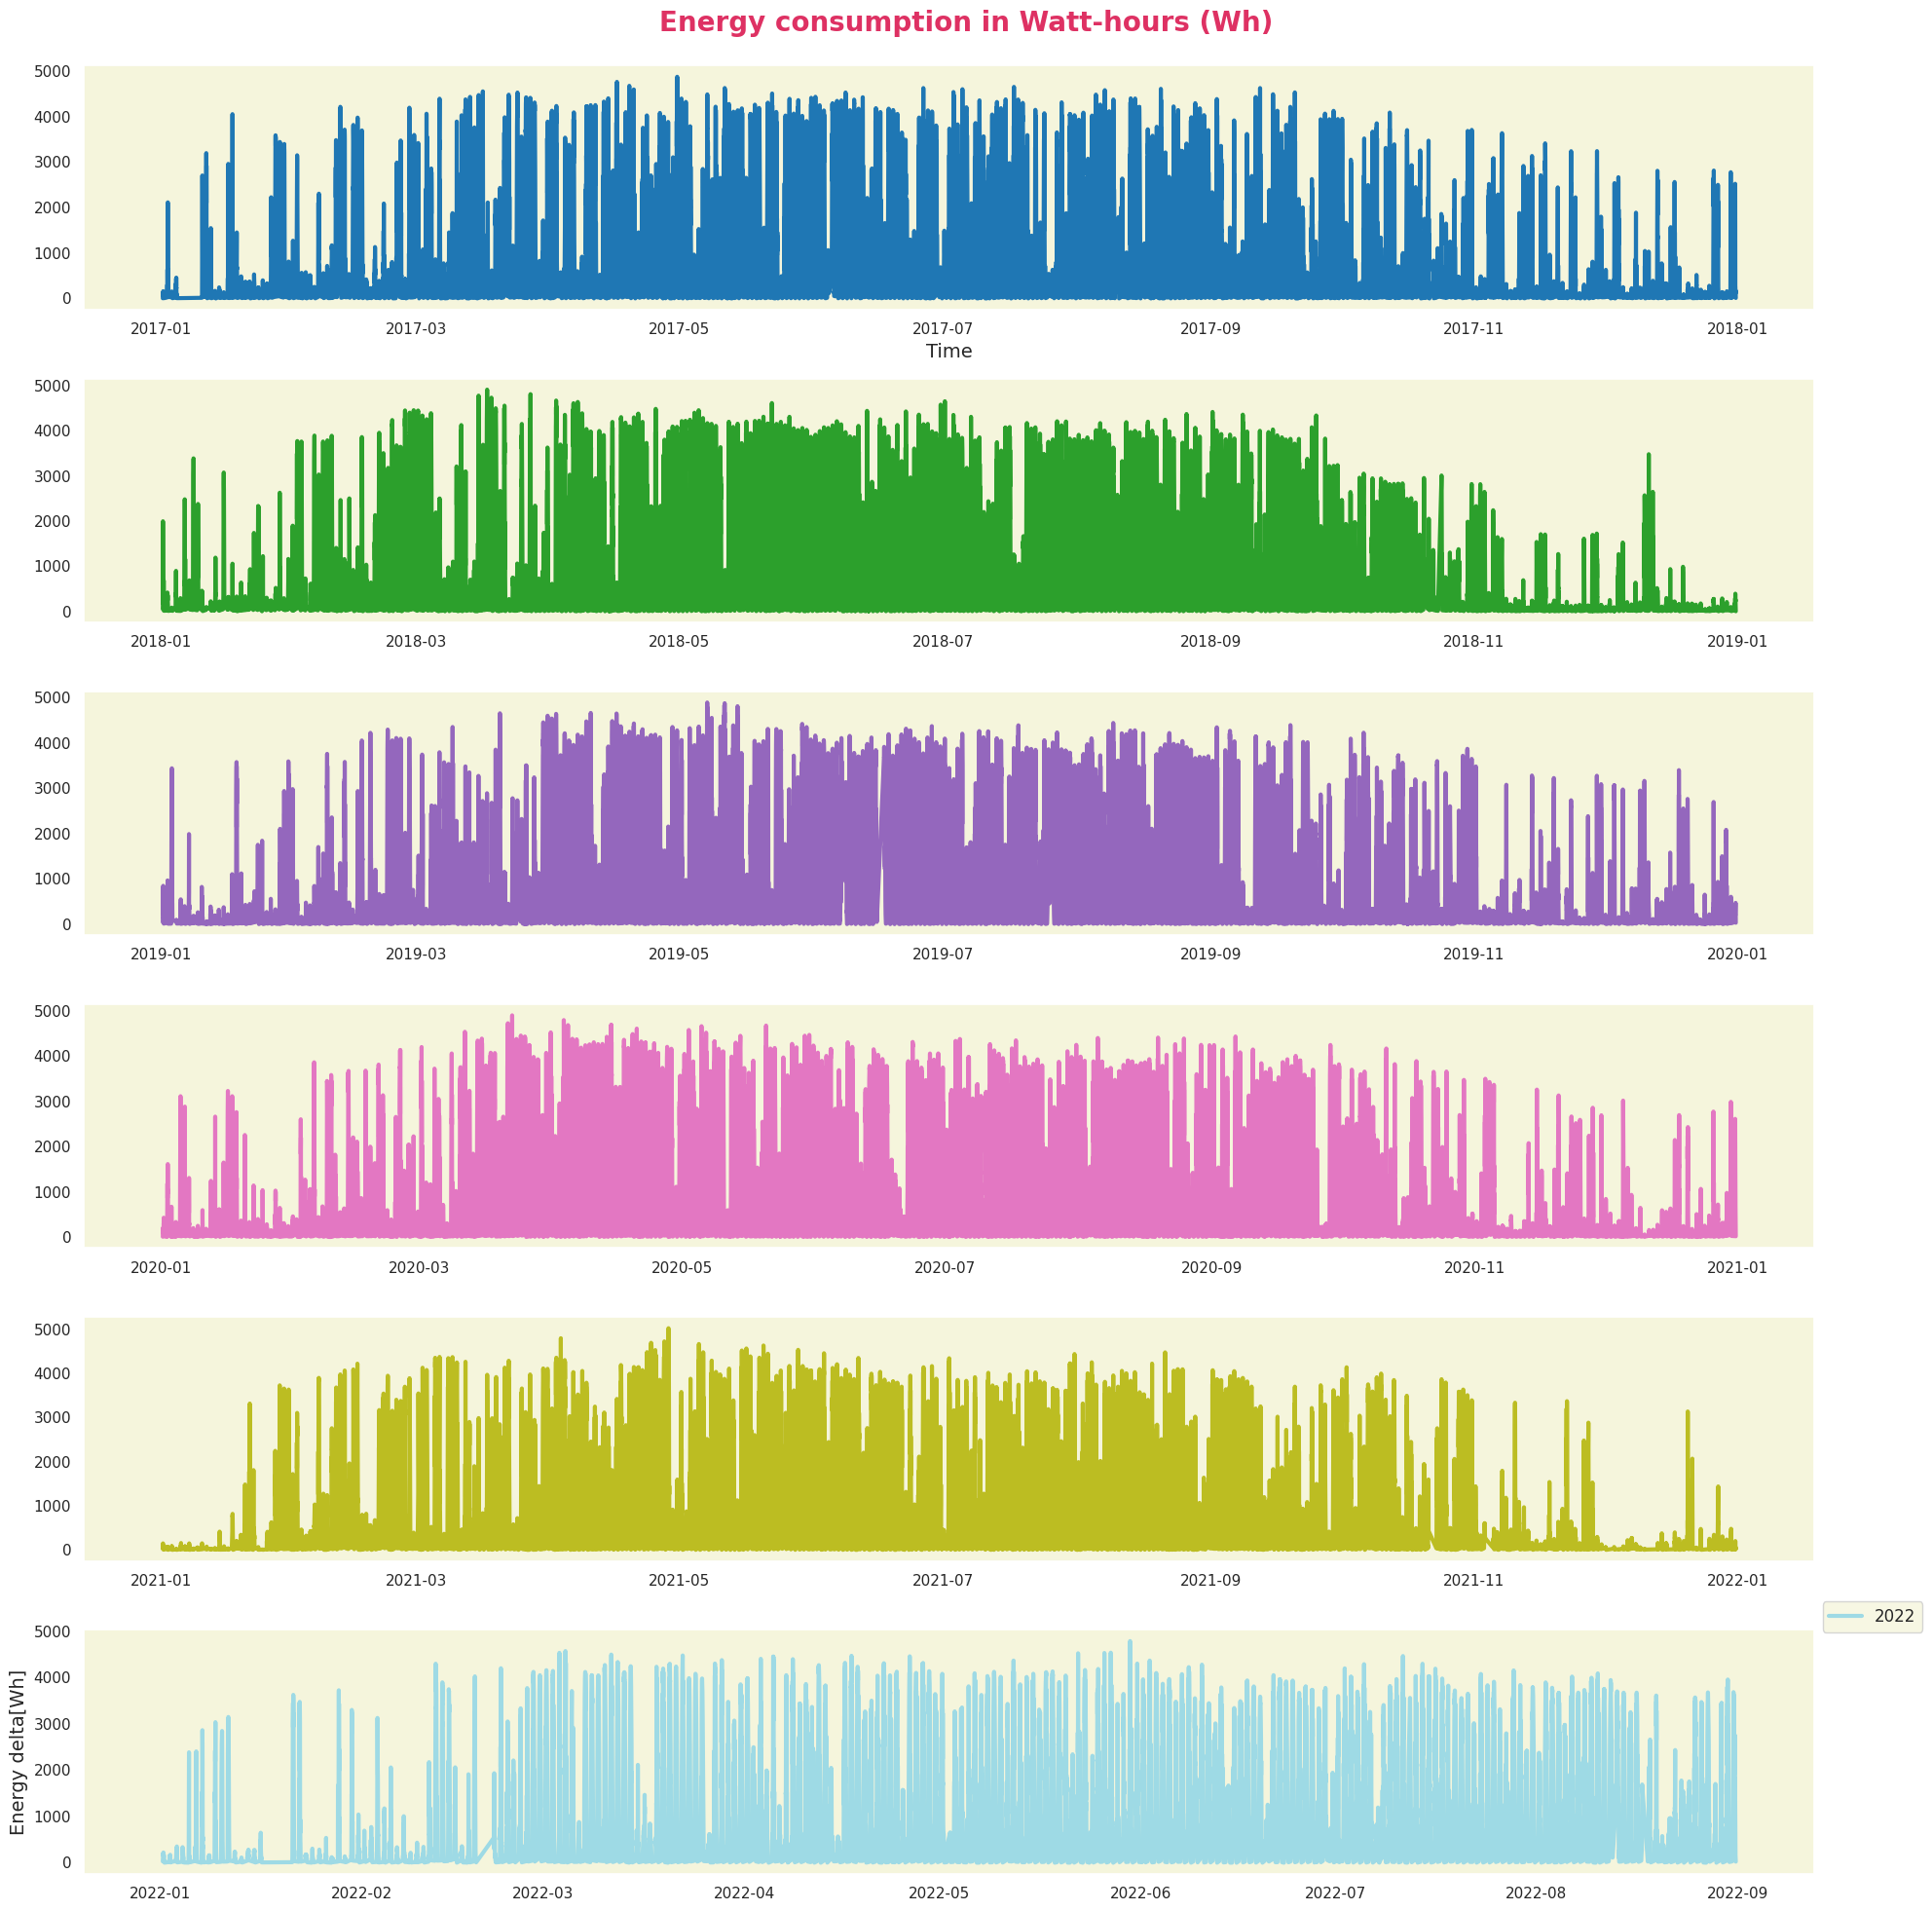

In [16]:
import matplotlib.cm as cm

df1 = df[['Time','Energy delta[Wh]']].copy('Deep')
df1 = df1.set_index('Time')

years = [2017, 2018, 2019, 2020, 2021, 2022]

cmap = cm.get_cmap('tab20')

fig, axs = plt.subplots(len(years), 1, figsize=(20, 20))  # Adjust figsize for layout
for i, year in enumerate(years):
    df_year = df1[(df1.index >= f"{year}-01-01") & (df1.index < f"{year+1}-01-01")]
    color = cmap(i / (len(years) - 1))  # Get color from colormap based on index
    axs[i].plot(df_year, lw=3, color=color, label=f"{year}")  # Include year as label

# Set common labels and title
axs[0].set_xlabel('Time', fontsize=14)  # Set on first subplot for all
axs[-1].set_ylabel('Energy delta[Wh]', fontsize=14)  # Set on last subplot for all
plt.suptitle('Energy consumption in Watt-hours (Wh)\n', weight='bold', fontsize=20, color='#DE3163')

# Add legend
handles, labels = axs[-1].get_legend_handles_labels()  # Get labels from last subplot
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1.15), fontsize=12)  # Add legend outside plot

plt.tight_layout()
plt.show()

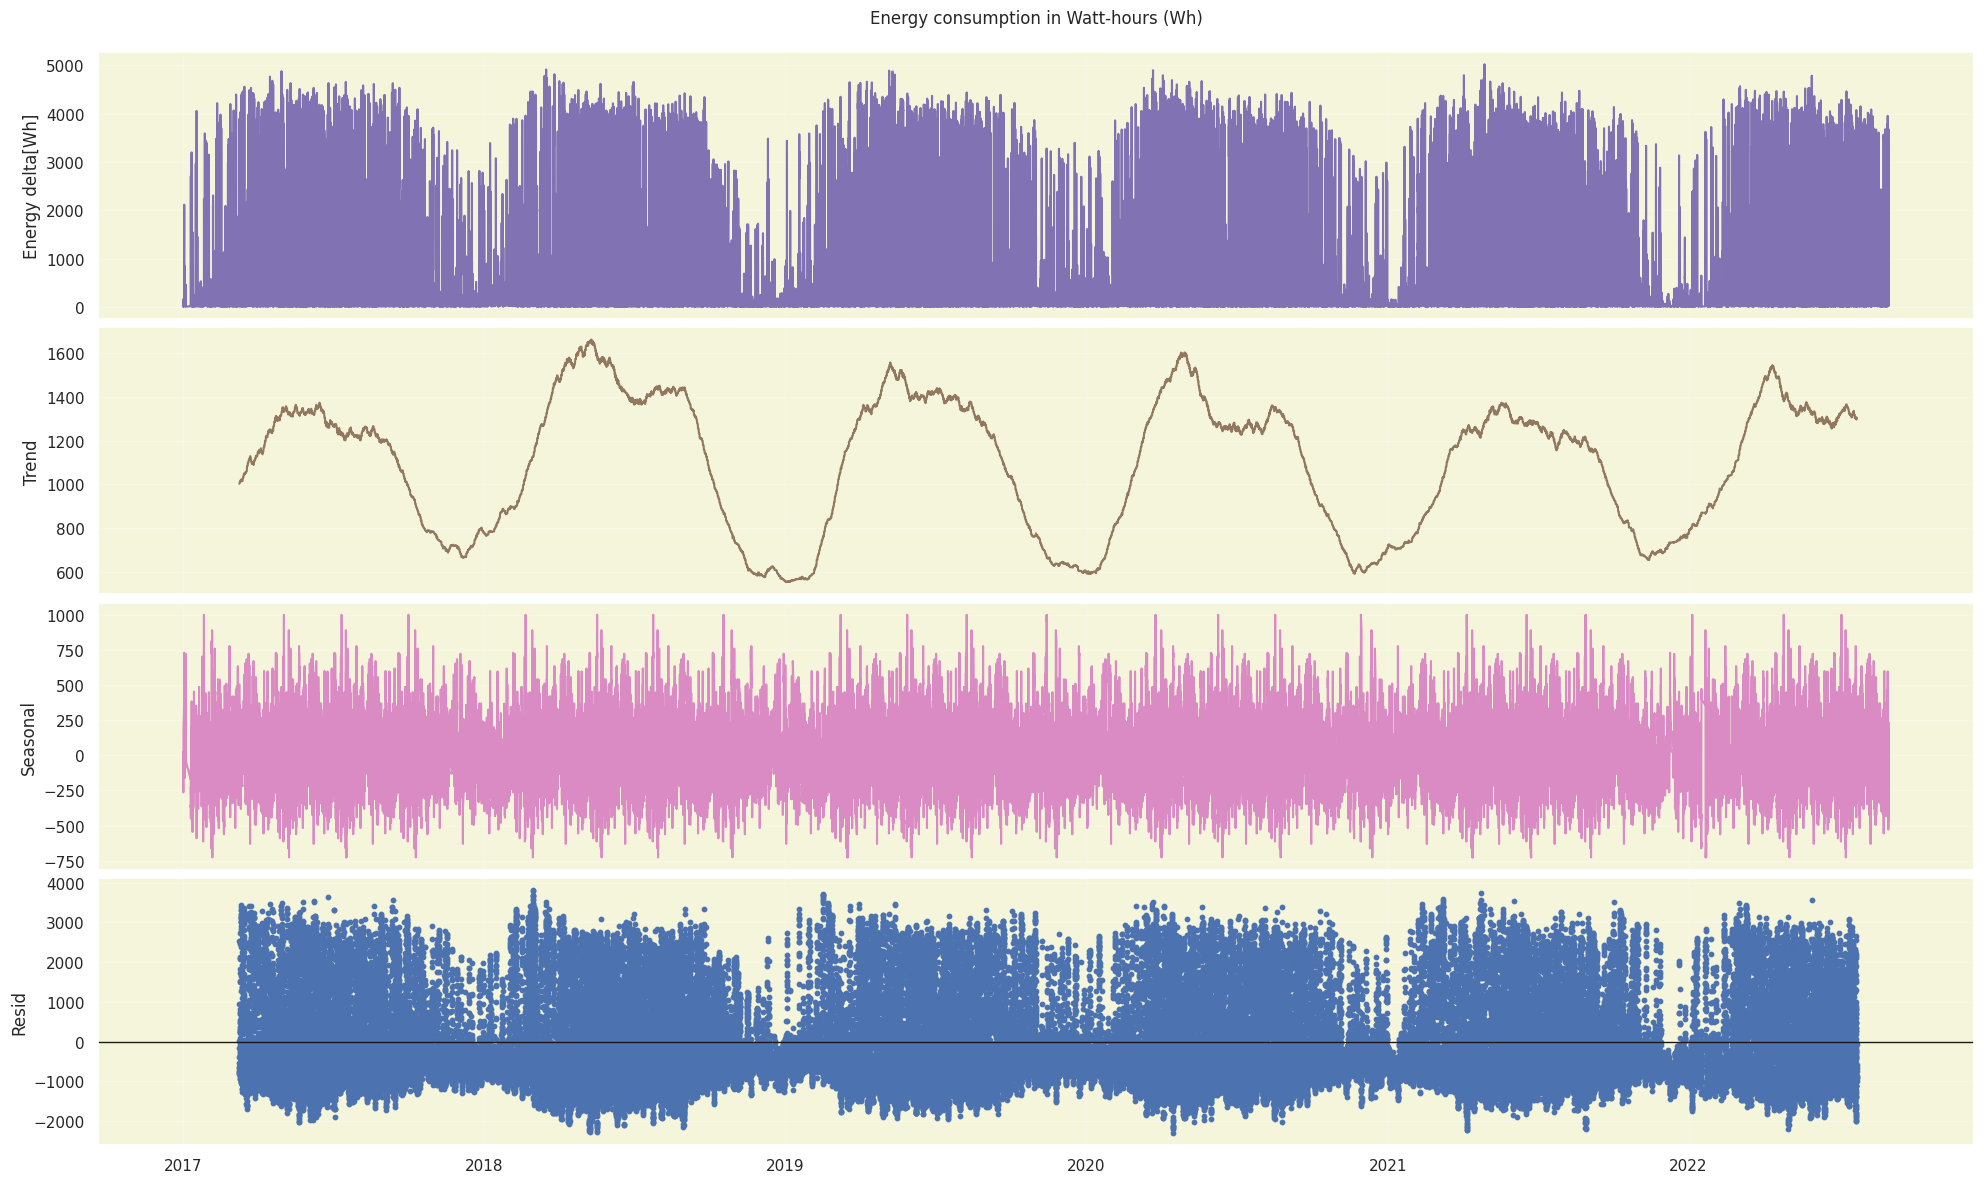

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decompose_plotter(df: pd.DataFrame, period=12, title='', figsize=(20, 12)):
    """
    Perform and plot seasonal decomposition of a time series.

    Parameters:
        df: DataFrame with time series data.
        col: Column name for data to decompose. Default is 'sqrt(O3 AQI)'.
        date_col: Column name for datetime values. Default is 'Date'.
        period: Seasonality period. Default is 12.

    Returns:
        A DecomposeResult object with seasonal, trend, and residual components.
    """
    # Decompostion
    decomposition = seasonal_decompose(df.values, period=period)
    de_season = decomposition.seasonal
    de_resid = decomposition.resid
    de_trend = decomposition.trend

    fig, ax = plt.subplots(4, sharex=True, figsize=figsize)

    ax[0].set_title(title)
    ax[0].plot(df.index, df.values, color='C4')
    ax[0].set_ylabel(df.keys()[0])
    ax[0].grid(alpha=0.25)

    ax[1].plot(df.index, de_trend, color='C5')
    ax[1].set_ylabel('Trend')
    ax[1].grid(alpha=0.25)

    ax[2].plot(df.index, de_season, color='C6')
    ax[2].set_ylabel('Seasonal')
    ax[2].grid(alpha=0.25)

    ax[3].axhline(y=0, color='k', linewidth=1)
    ax[3].scatter(df.index, de_resid, color='C0', s=10)
    ax[3].set_ylabel('Resid')
    ax[3].grid(alpha=0.25)

    plt.tight_layout(h_pad=0)
    plt.show()

    return decomposition

_ = seasonal_decompose_plotter(df1, period=365*12, title='Energy consumption in Watt-hours (Wh)\n', figsize=(20, 12))


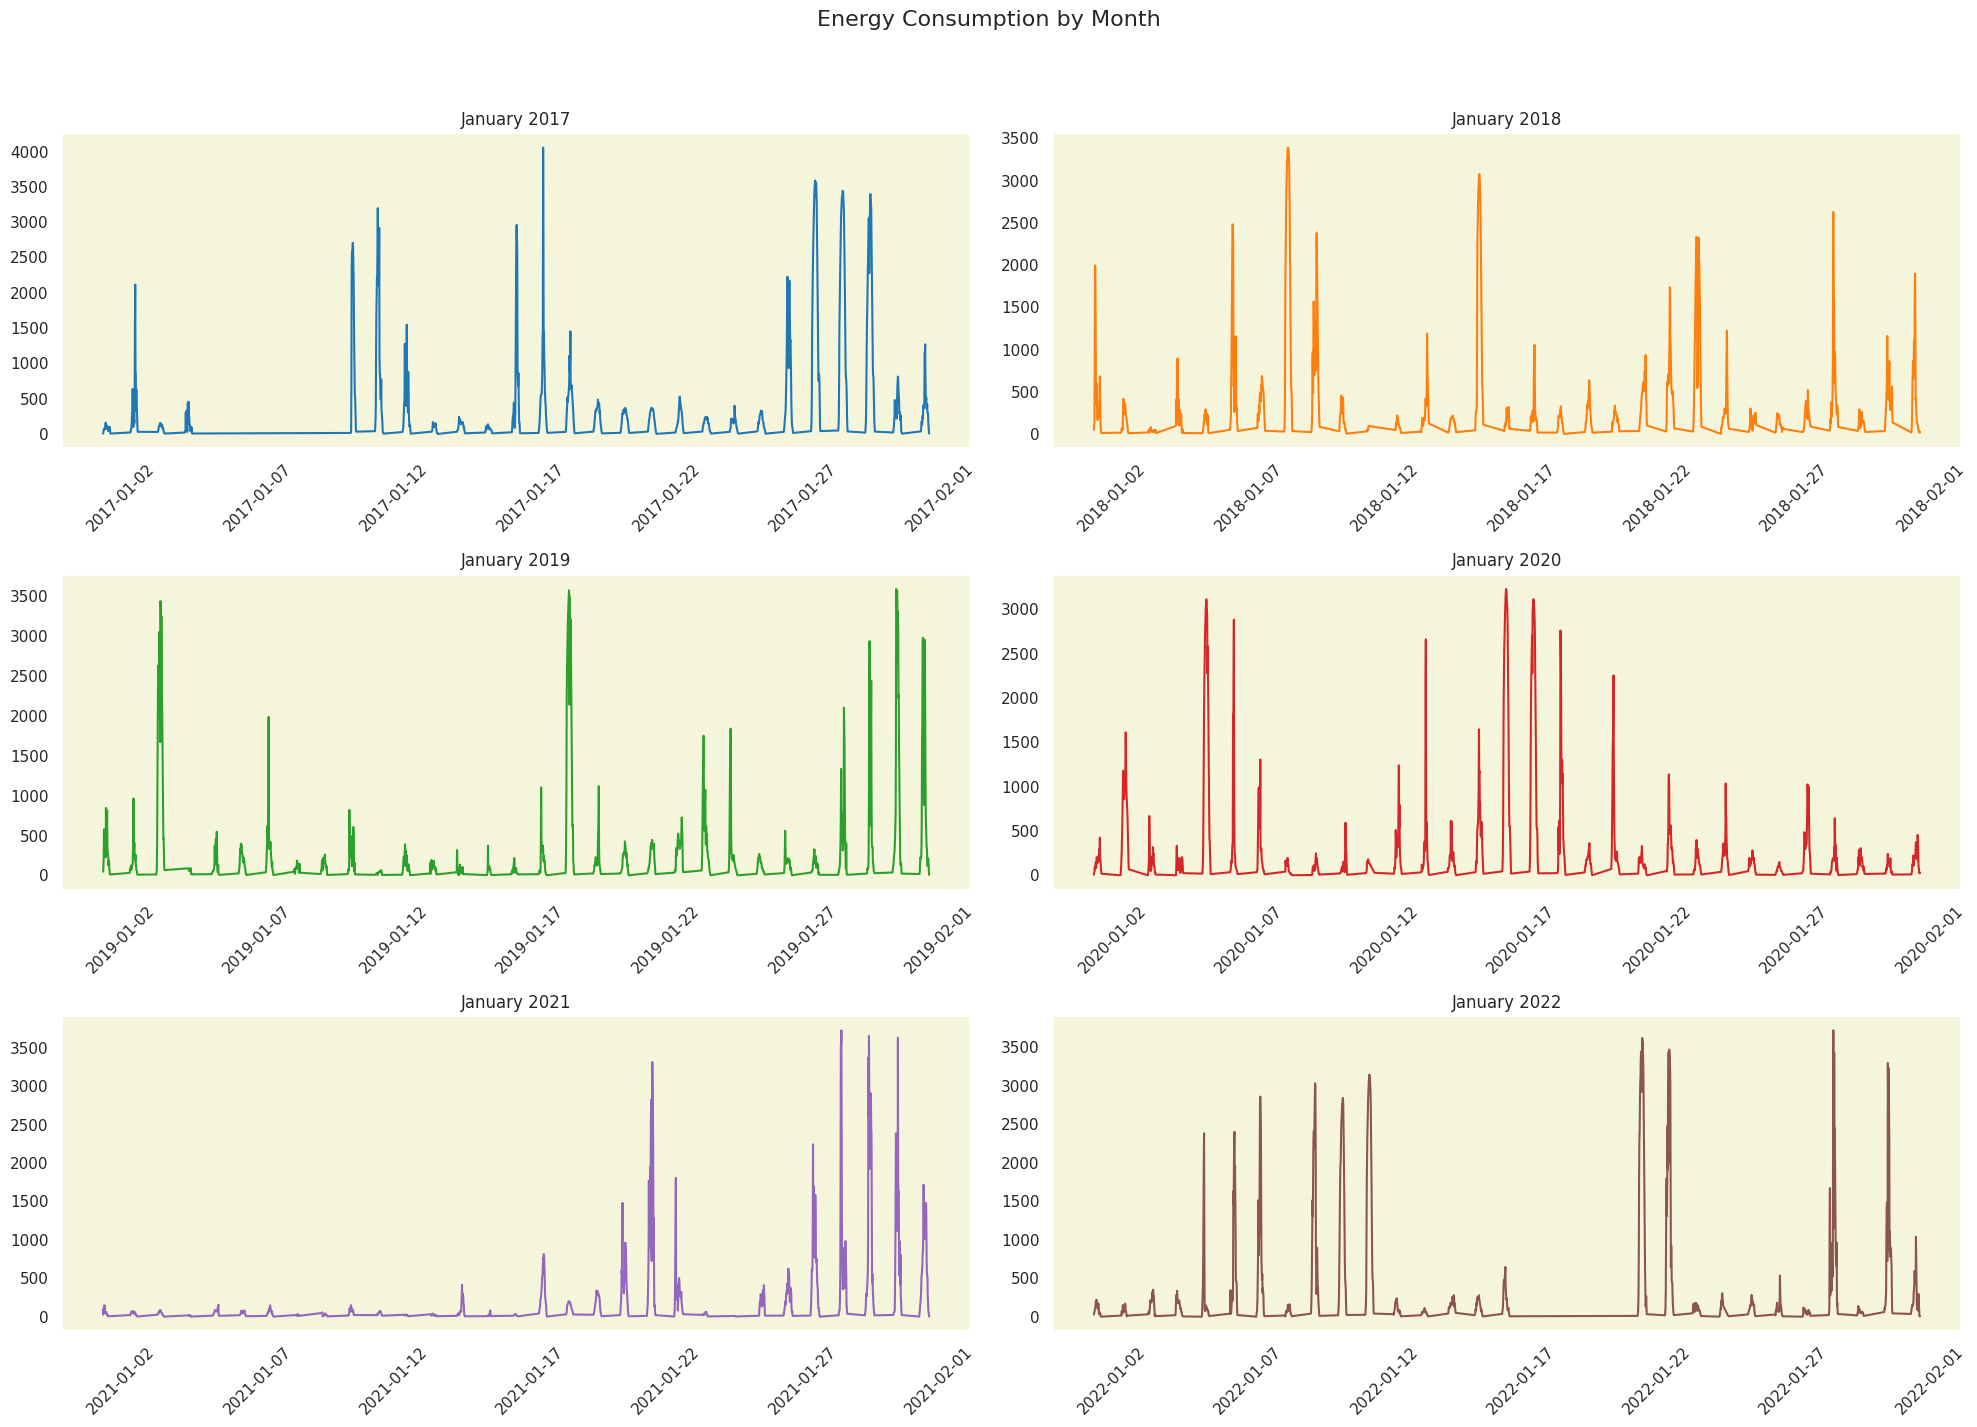

In [21]:
import matplotlib.dates as mdates

month_one   = df1.loc[(df1.index >= '2017-01-01 01:00:00') & (df1.index <= '2017-02-01 01:00:00')]
month_two   = df1.loc[(df1.index >= '2018-01-01 01:00:00') & (df1.index <= '2018-02-01 01:00:00')]
month_three = df1.loc[(df1.index >= '2019-01-01 01:00:00') & (df1.index <= '2019-02-01 01:00:00')]
month_four  = df1.loc[(df1.index >= '2020-01-01 01:00:00') & (df1.index <= '2020-02-01 01:00:00')]
month_five  = df1.loc[(df1.index >= '2021-01-01 01:00:00') & (df1.index <= '2021-02-01 01:00:00')]
month_six   = df1.loc[(df1.index >= '2022-01-01 01:00:00') & (df1.index <= '2022-02-01 01:00:00')]

months = [month_one, month_two, month_three, month_four, month_five, month_six]
month_labels = ['January 2017','January 2018','January 2019', 'January 2020', 'January 2021', 'January 2022']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
fig.suptitle('Energy Consumption by Month ', fontsize=16)

axes = axes.flatten()

colors = sns.color_palette('tab10', 6)

for i, month in enumerate(months):
    axes[i].plot(month.index, month['Energy delta[Wh]'], color = colors[i])
    axes[i].set_title(month_labels[i])

    axes[i].xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Setting x axis tick marks/intervals

    axes[i].tick_params(axis='x', rotation=45)  # rotate x-axis labels

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

In [22]:
df2 = df1.reset_index('Time')
df2.head()

Time  Energy delta[Wh]
0 2017-01-01 08:00:00                 5
1 2017-01-01 08:15:00                33
2 2017-01-01 08:30:00                44
3 2017-01-01 08:45:00                61
4 2017-01-01 09:00:00                65

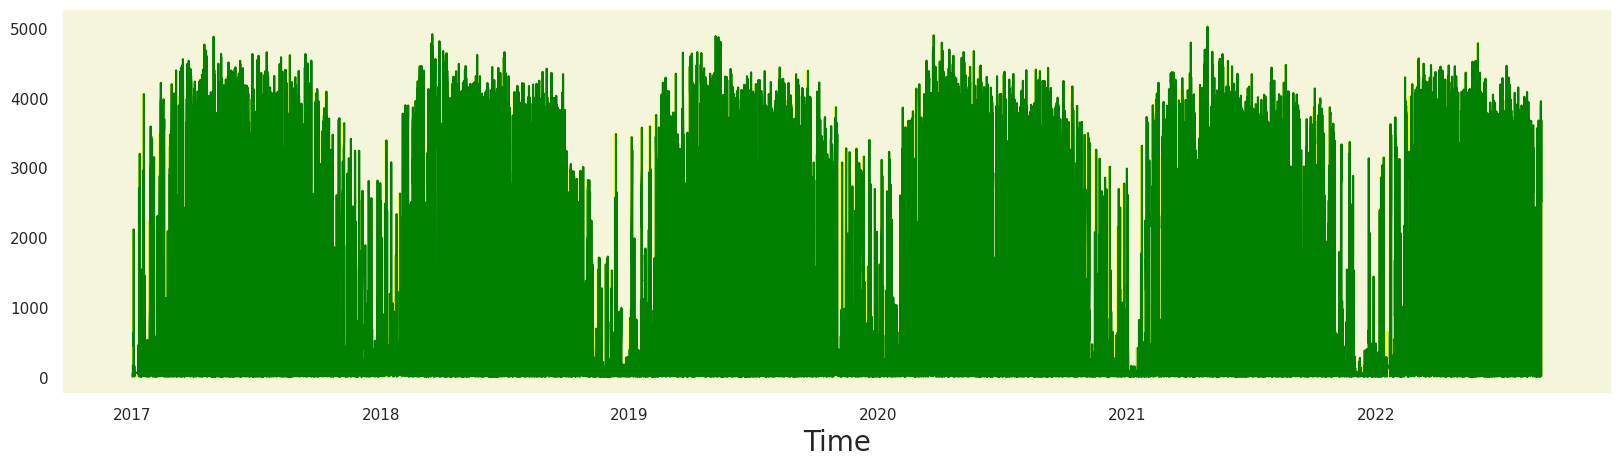

In [25]:
# 15 Minute interval Plot

plt.figure(figsize=(20,5))
plt.plot(df1, color='Yellow')
plt.plot(df1.shift(24), color='Green')
plt.xlabel('Time', fontsize=20);

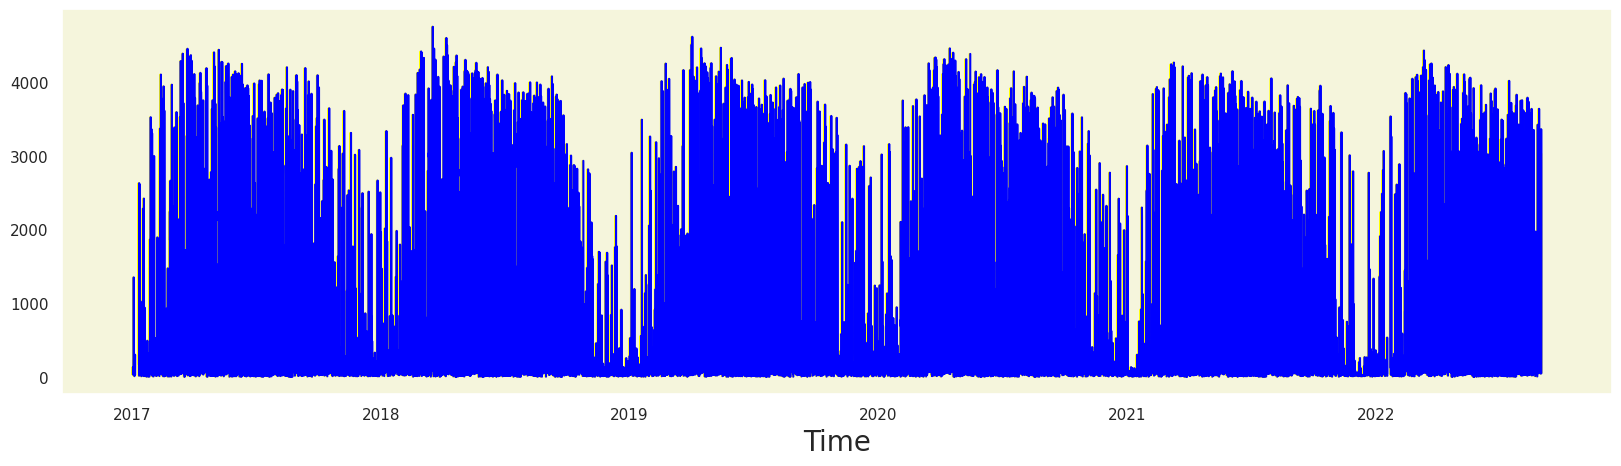

In [33]:
# Hourly Plot

df3 = df2.copy('deep')
df3 = df3.set_index('Time')
df_hourly = df3.resample('H').mean()
df_hourly.head()

plt.figure(figsize=(20,5))
plt.plot(df_hourly, color='Yellow')
plt.plot(df_hourly.shift(24), color='Blue')
plt.xlabel('Time', fontsize=20);

The autocorrelation function (ACF) reveals how the correlation between any two values of the signal changes as their separation changes

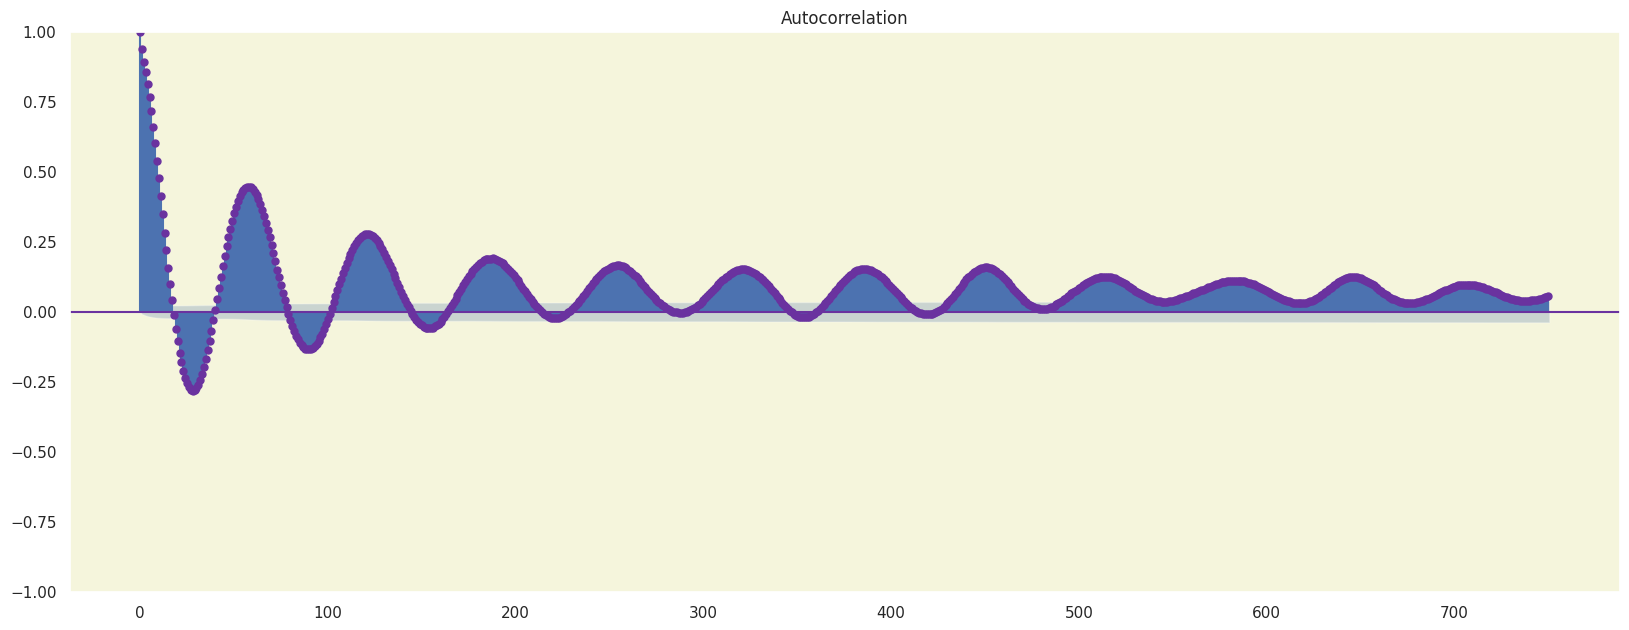

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def subplots_acf(series):
    fig1 = plt.figure(figsize=(20,16))
    ax1 = fig1.add_subplot(211)
    fig1 = plot_acf(series, lags=750, ax=ax1, color='#6A329F')
    plt.show()

subplots_acf(df1)

In [36]:
# Check for NaN values in the original DataFrame
print("NaNs in original data:", df1.isna().any())

# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(df1)
#scaler_data = scaler_data[:, 0]  # Assuming filtered_dfx has only one column

# Check for NaNs after scaling
print("NaNs after scaling:", np.isnan(scaler_data).any())

# Create DataFrame
index = np.arange(0, len(scaler_data), 1)
scaler_df = pd.DataFrame(scaler_data, index=index, columns=['Energy delta[Wh]'])

# Splitting the data
train_size = int(len(scaler_df) * 0.8)
train, test = scaler_df.iloc[0:train_size], scaler_df.iloc[train_size:len(scaler_df)]

print("Train size:", len(train), "Test size:", len(test))

NaNs in original data: Energy delta[Wh]    False
dtype: bool
NaNs after scaling: False
Train size: 76740 Test size: 19186


In [37]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Define the time steps
n_steps = 24

# Prepare training data
X_train, y_train = create_dataset(train, train['Energy delta[Wh]'], n_steps)

# Prepare test data
X_test, y_test = create_dataset(test, test['Energy delta[Wh]'], n_steps)

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (76716, 24, 1) (76716,)
Test data shape: (19162, 24, 1) (19162,)


In [38]:
pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


**LSTM**

Long short-term memory (LSTM) is a type of recurrent neural network (RNN) aimed at dealing with the vanishing gradient problem present in traditional RNNs. Its relative insensitivity to gap length is its advantage over other RNNs, hidden Markov models and other sequence learning methods. It aims to provide a short-term memory for RNN that can last thousands of timesteps, thus "long short-term memory". It is applicable to classification, processing and predicting data based on time series, such as in handwriting, speech recognition, machine translation, speech activity detection, robot control, video games, and healthcare.


In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.models import Sequential

In [40]:
# Model Architecture
lstm_model = keras.Sequential([
    LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
lstm_model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(0.001)
)

# Callbacks (Corrected)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # patience=10
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', monitor='val_loss', save_best_only=True)

In [41]:
# Model Training
history = lstm_model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=24,
    validation_split=0.1,
    verbose=1,
    shuffle=False,
    callbacks=[early_stopping, model_checkpoint]
)

lstm_pred = lstm_model.predict(X_test)
df_lstm_final = test[lstm_pred.shape[0]*-1:].copy()
df_lstm_final['Prediction'] = lstm_pred[:,0]
df_reset_index = df1.reset_index()
df_lstm_final['Date'] = df_reset_index['Time']
df_lstm_final = df_lstm_final.set_index(["Date"], drop=True)

df_lstm_final.head()

Epoch 1/250
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 144s 47ms/step - loss: 0.0113 - val_loss: 0.0087
Epoch 2/250
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 143s 50ms/step - loss: 0.0074 - val_loss: 0.0088
Epoch 3/250
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 190s 45ms/step - loss: 0.0071 - val_loss: 0.0087
Epoch 4/250
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 137s 44ms/step - loss: 0.0071 - val_loss: 0.0086
Epoch 5/250
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 126s 44ms/step - loss: 0.0069 - val_loss: 0.0088
Epoch 6/250
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 139s 43ms/step - loss: 0.0069 - val_loss: 0.0085
Epoch 7/250
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 143s 43ms/step - loss: 0.0067 - val_loss: 0.0085
Epoch 8/250
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 144s 44ms/step - loss: 0.0067 - val_loss: 0.0087
Epoch 9/250
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 141s 43ms/step - loss: 0.0066 - val_loss: 0.0084
Epoch 10/250
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 140s 43ms/step - loss: 0.0066 - val_loss: 0.0083
Epoch 11/250
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 140s 42ms/step - loss: 0.0066 - val

Energy delta[Wh]  Prediction
Date                                             
2021-07-15 03:30:00          0.019526    0.019645
2021-07-15 03:45:00          0.020124    0.033928
2021-07-15 04:00:00          0.025902    0.029766
2021-07-15 04:15:00          0.033473    0.040220
2021-07-15 04:30:00          0.044630    0.049073

In [42]:
df_lstm_final['Energy delta[Wh]'] = scaler.inverse_transform(df_lstm_final['Energy delta[Wh]'].to_numpy().reshape(-1, 1))
df_lstm_final['Prediction'] = scaler.inverse_transform(df_lstm_final['Prediction'].to_numpy().reshape(-1, 1))
df_lstm_final.head()

Energy delta[Wh]  Prediction
Date                                             
2021-07-15 03:30:00              99.0   99.597160
2021-07-15 03:45:00             102.0  171.285339
2021-07-15 04:00:00             131.0  150.395218
2021-07-15 04:15:00             169.0  202.861908
2021-07-15 04:30:00             225.0  247.296844

In [43]:
df_lstm_final['Error'] = df_lstm_final['Energy delta[Wh]'] - df_lstm_final['Prediction']
df_lstm_final.head()

Energy delta[Wh]  Prediction      Error
Date                                                        
2021-07-15 03:30:00              99.0   99.597160  -0.597160
2021-07-15 03:45:00             102.0  171.285339 -69.285339
2021-07-15 04:00:00             131.0  150.395218 -19.395218
2021-07-15 04:15:00             169.0  202.861908 -33.861908
2021-07-15 04:30:00             225.0  247.296844 -22.296844

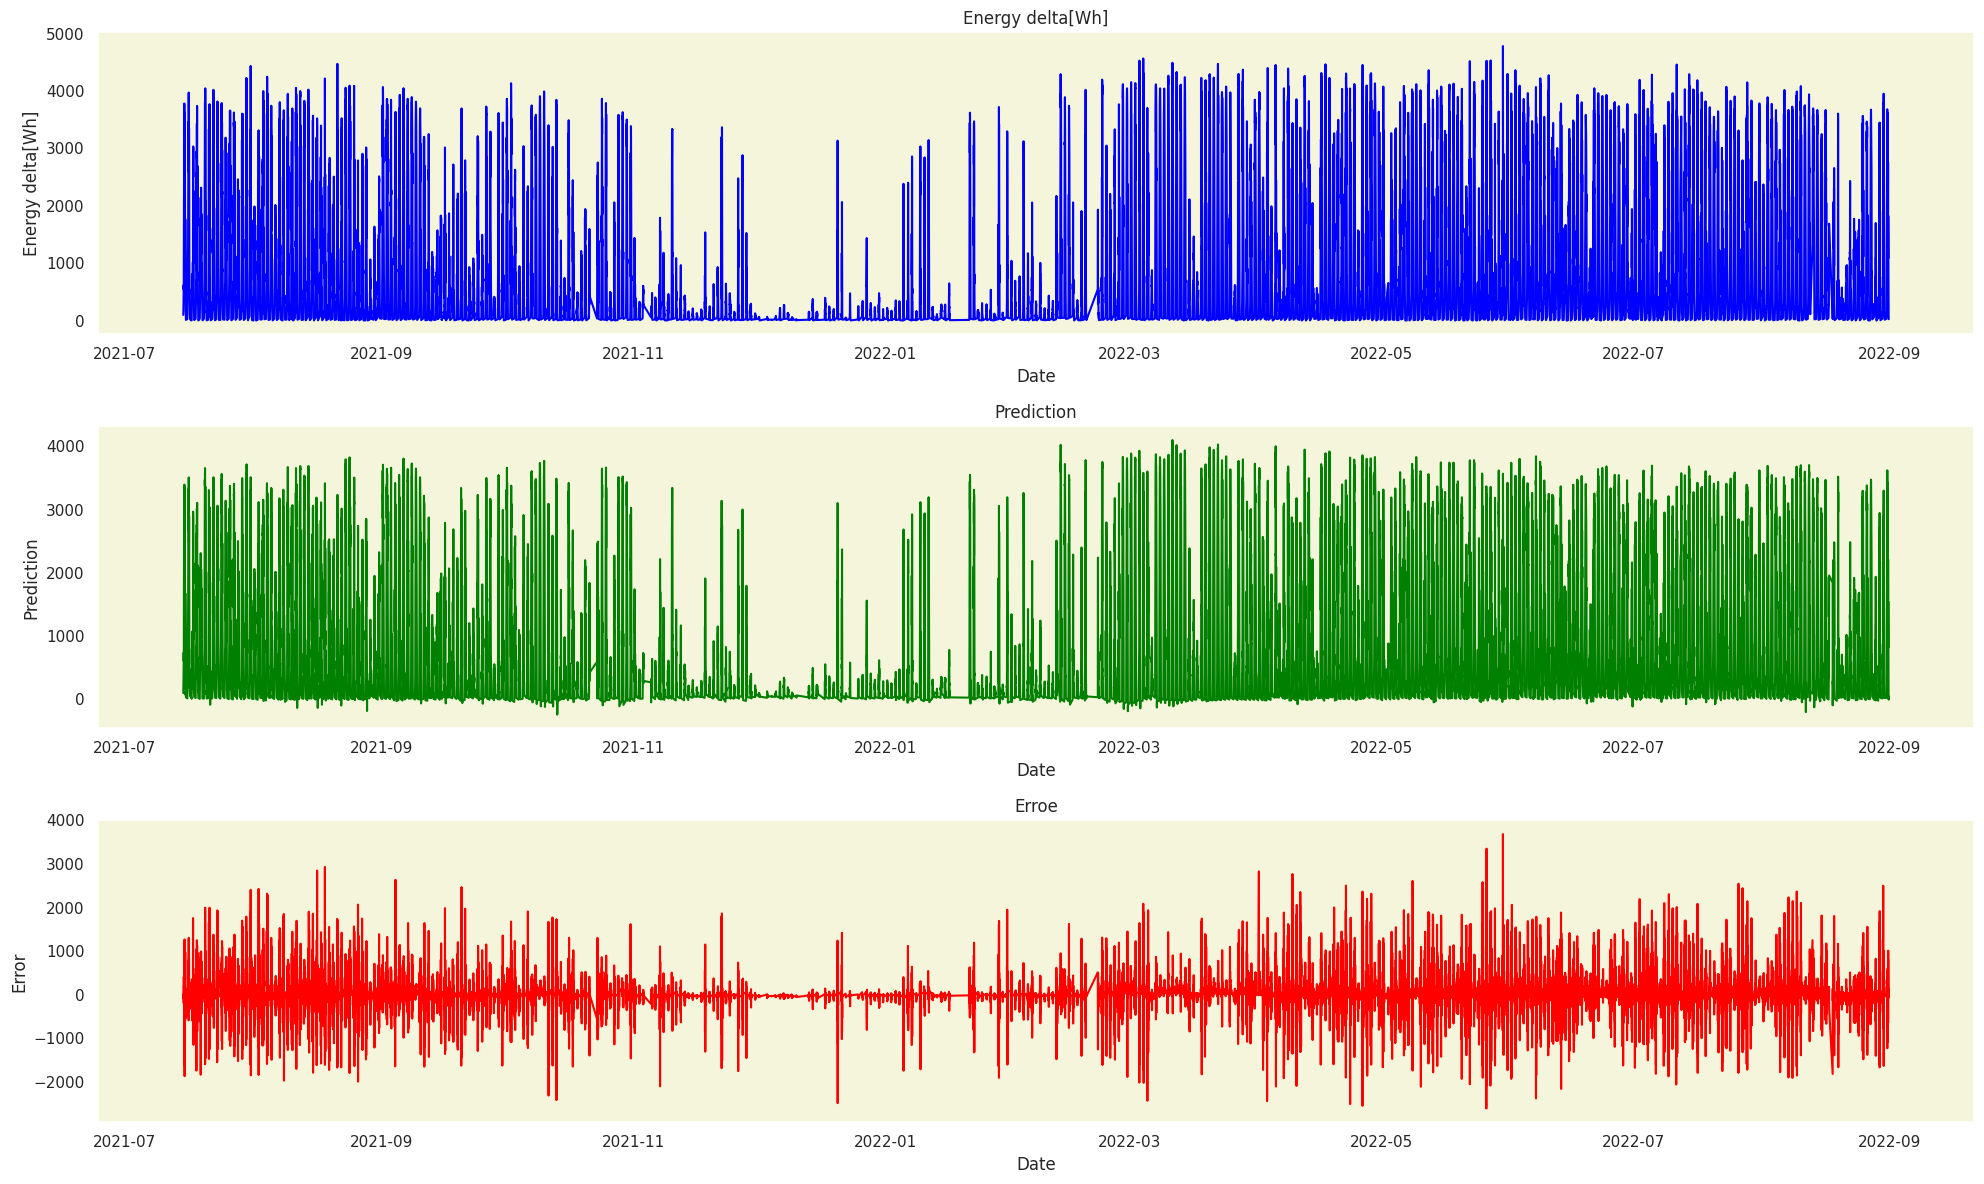

In [44]:
# Create separate plots for each column
fig, axes = plt.subplots(3, 1, figsize=(20, 12))  # Adjust figsize as needed

# Error plot
sns.lineplot(ax=axes[0], data=df_lstm_final, x=df_lstm_final.index, y='Energy delta[Wh]', color='Blue');
axes[0].set_title('Energy delta[Wh]')

# Energy delta[Wh] plot
sns.lineplot(ax=axes[1], data=df_lstm_final, x=df_lstm_final.index, y='Prediction', color = 'Green');
axes[1].set_title('Prediction')

# Prediction plot
sns.lineplot(ax=axes[2], data=df_lstm_final, x=df_lstm_final.index, y='Error', color = 'Red');
axes[2].set_title('Erroe')

# Adjust layout (optional)
plt.tight_layout()

plt.show()

In [46]:
print(df2.columns.tolist())

['Time', 'Energy delta[Wh]']


In [47]:
df2.head()

Time  Energy delta[Wh]
0 2017-01-01 08:00:00                 5
1 2017-01-01 08:15:00                33
2 2017-01-01 08:30:00                44
3 2017-01-01 08:45:00                61
4 2017-01-01 09:00:00                65

In [48]:
train2 = train.copy()
train2.index = df2.index[:len(train)]
train2['Energy delta[Wh]'] = scaler.inverse_transform(train2['Energy delta[Wh]'].to_numpy().reshape(-1, 1))
train2['Time'] = df2['Time']
train2 = train2.set_index(['Time'])
train2.head()

Energy delta[Wh]
Time                                 
2017-01-01 08:00:00               5.0
2017-01-01 08:15:00              33.0
2017-01-01 08:30:00              44.0
2017-01-01 08:45:00              61.0
2017-01-01 09:00:00              65.0

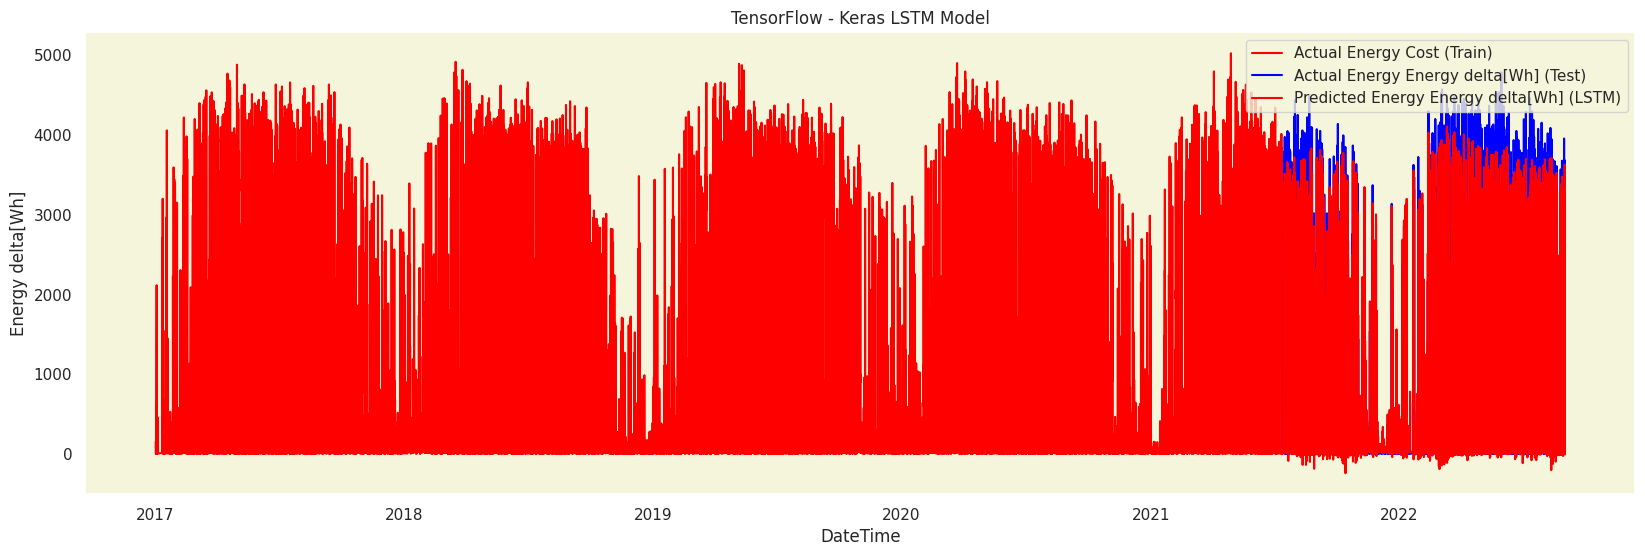

Explained Variance:
	 0.8845482159917765
MAE:
	 238.99143921461723
RMSE:
	 415.14575474217645


In [49]:
from sklearn import metrics

def report_metrics(y_true, y_pred):
    print("Explained Variance:\n\t", metrics.explained_variance_score(y_true, y_pred))
    print("MAE:\n\t", metrics.mean_absolute_error(y_true, y_pred))
    print("RMSE:\n\t", np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

plt.figure(figsize=(20,6))
plt.title('TensorFlow - Keras LSTM Model')
plt.plot(train2, color='red', label='Actual Energy Cost (Train)')
plt.xlabel('DateTime')
plt.ylabel('Energy delta[Wh]')
plt.plot(df_lstm_final['Energy delta[Wh]'], color='Blue', label='Actual Energy Energy delta[Wh] (Test)')
plt.plot(df_lstm_final['Prediction'], color='Red', label='Predicted Energy Energy delta[Wh] (LSTM)')
plt.legend()

plt.show()

report_metrics(df_lstm_final['Energy delta[Wh]'].squeeze(), df_lstm_final['Prediction'].squeeze())

In [50]:
# Format data for prophet model using ds and y
df_final = df1.copy('Deep')
df_final  = df_final.reset_index().rename(columns={'Time':'ds','Energy delta[Wh]':'y'})
df_final.head()

ds   y
0 2017-01-01 08:00:00   5
1 2017-01-01 08:15:00  33
2 2017-01-01 08:30:00  44
3 2017-01-01 08:45:00  61
4 2017-01-01 09:00:00  65

In [51]:
from prophet import Prophet
## Creating model parameters
model_param ={
    "daily_seasonality": True,
    "weekly_seasonality":True,
    "yearly_seasonality":True,
    "seasonality_mode": "multiplicative",
    "changepoint_prior_scale":0.5
}

In [52]:
model = Prophet(**model_param)
model.fit(df_final)

# Create future dataframe
future= model.make_future_dataframe(periods=365*24*2 ,freq='h')
forecast= model.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp05nd_15s/xdnkaj5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05nd_15s/ueh6z6dx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9794', 'data', 'file=/tmp/tmp05nd_15s/xdnkaj5n.json', 'init=/tmp/tmp05nd_15s/ueh6z6dx.json', 'output', 'file=/tmp/tmp05nd_15s/prophet_modelfjmkuf8b/prophet_model-20240606192518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:25:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:28:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


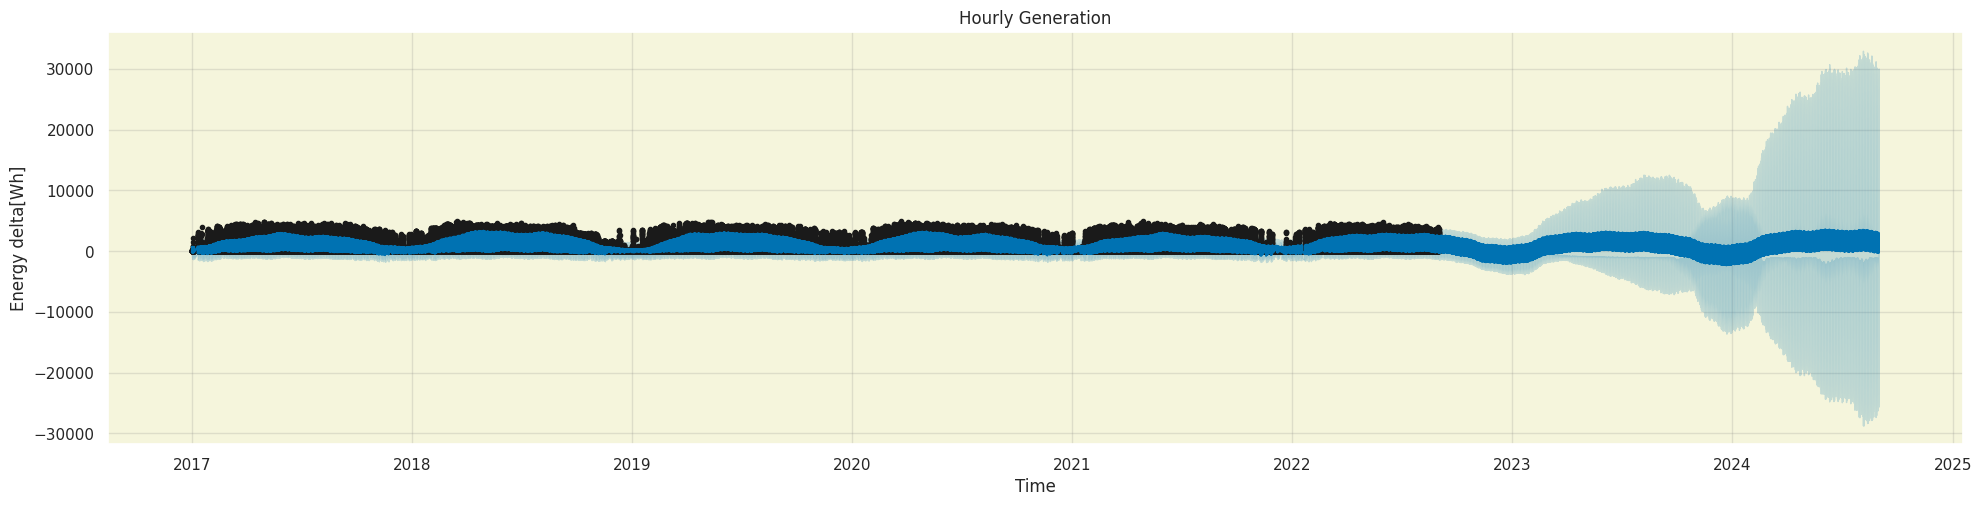

In [53]:
fig = model.plot(forecast, xlabel='Time', ylabel=r'Energy delta[Wh]',figsize=(20, 5))
plt.title('Hourly Generation')
plt.show()

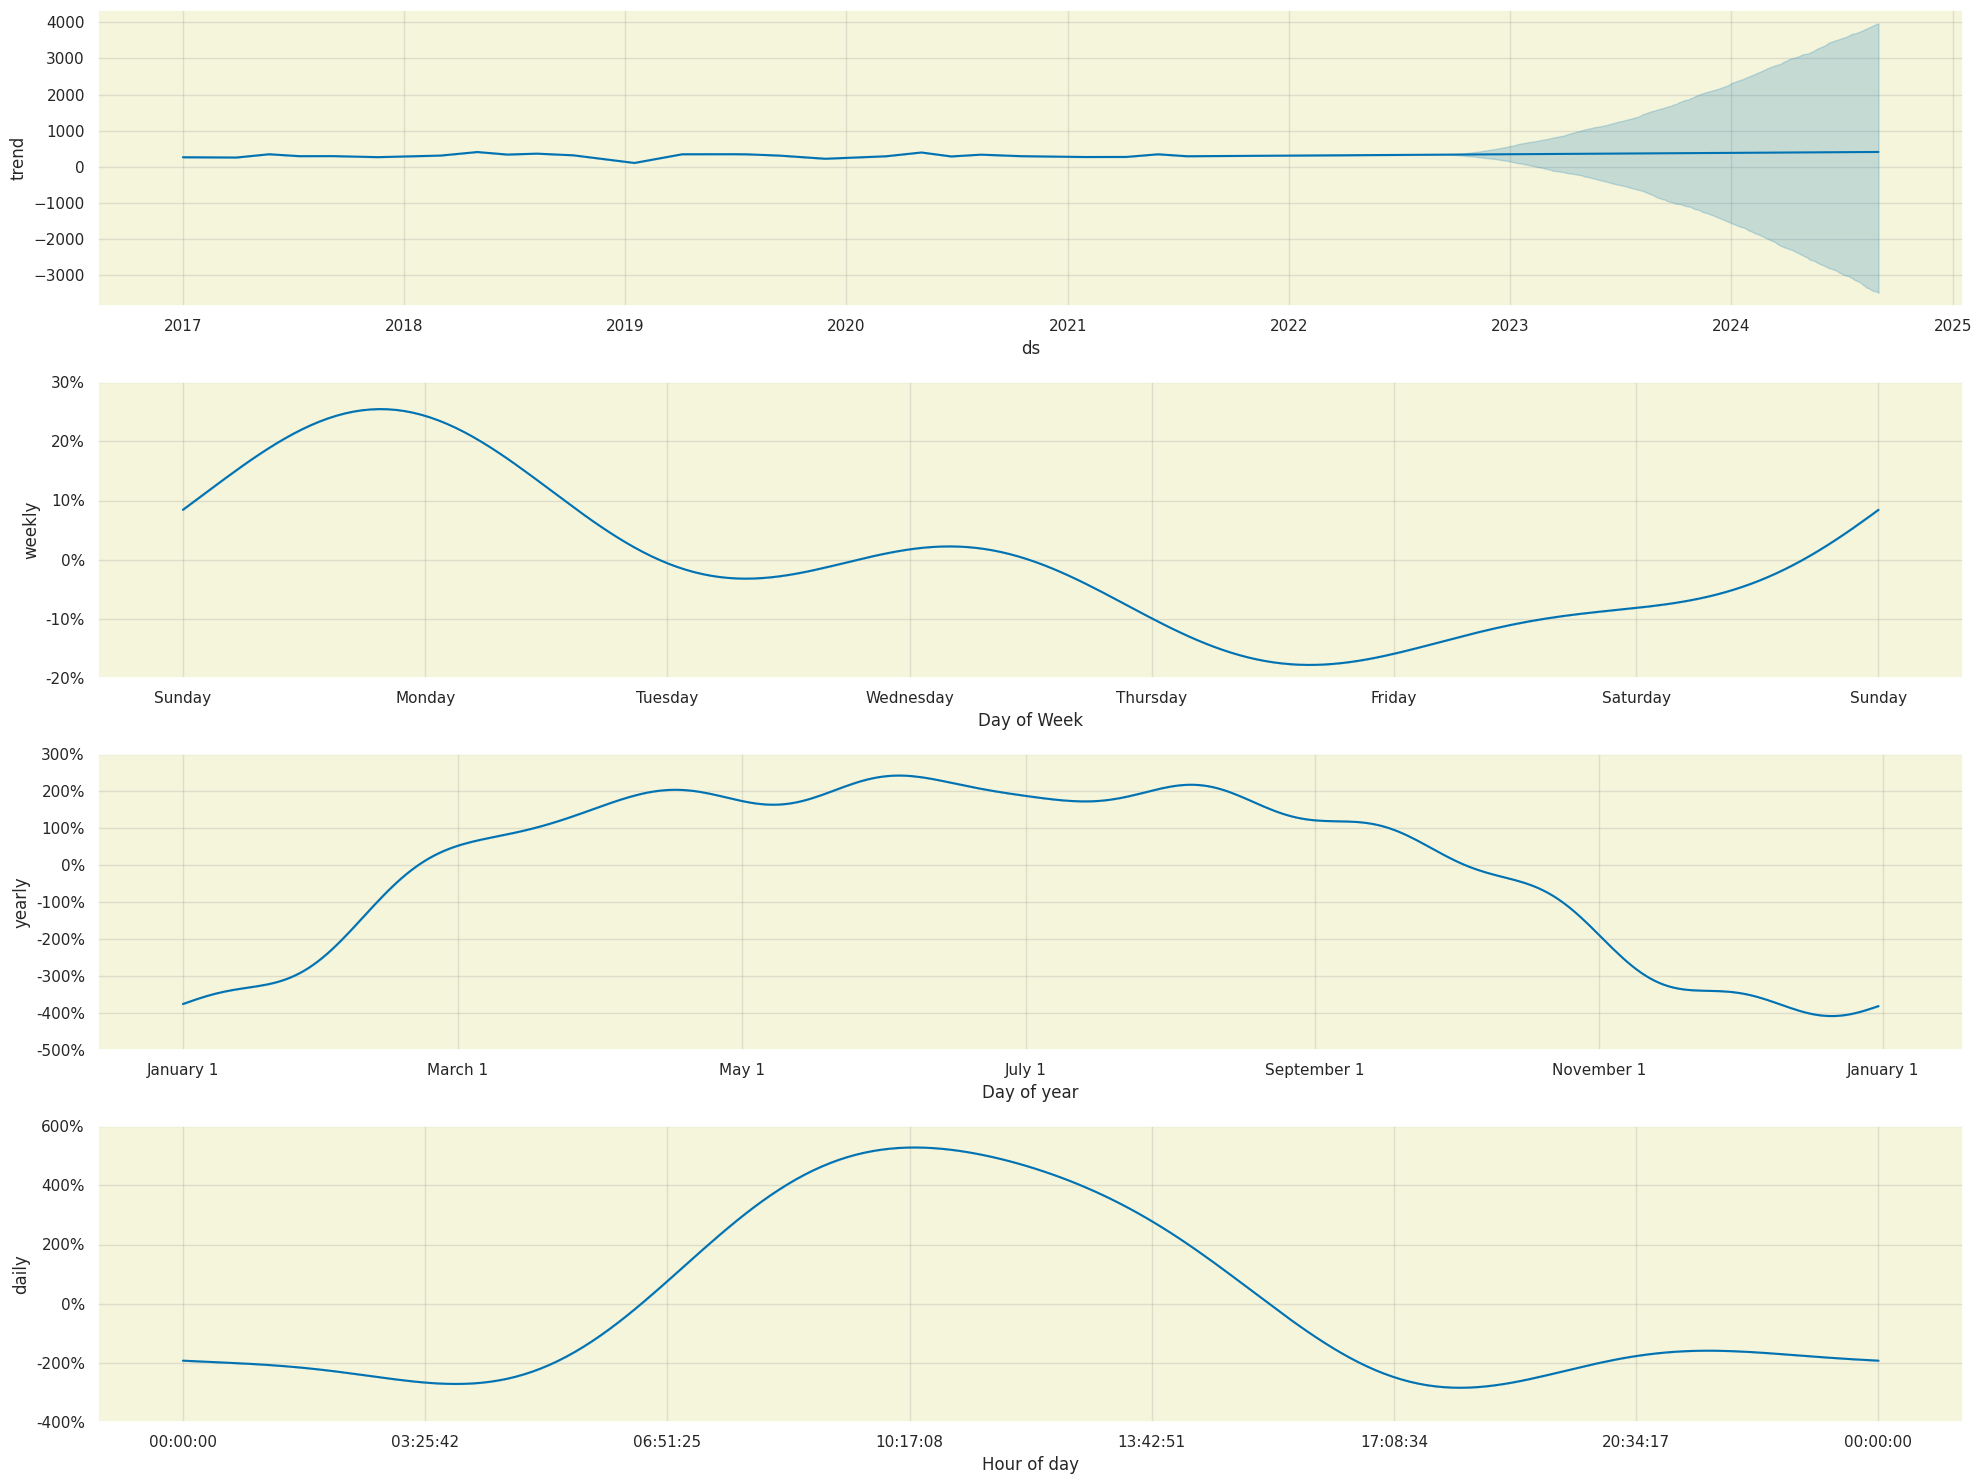

In [54]:
fig3 = model.plot_components(forecast,uncertainty=True,figsize=(20, 15))
plt.show()

In [55]:
df_final = df_final[df_final['y'] != 6]
df_final.head()

ds   y
0 2017-01-01 08:00:00   5
1 2017-01-01 08:15:00  33
2 2017-01-01 08:30:00  44
3 2017-01-01 08:45:00  61
4 2017-01-01 09:00:00  65

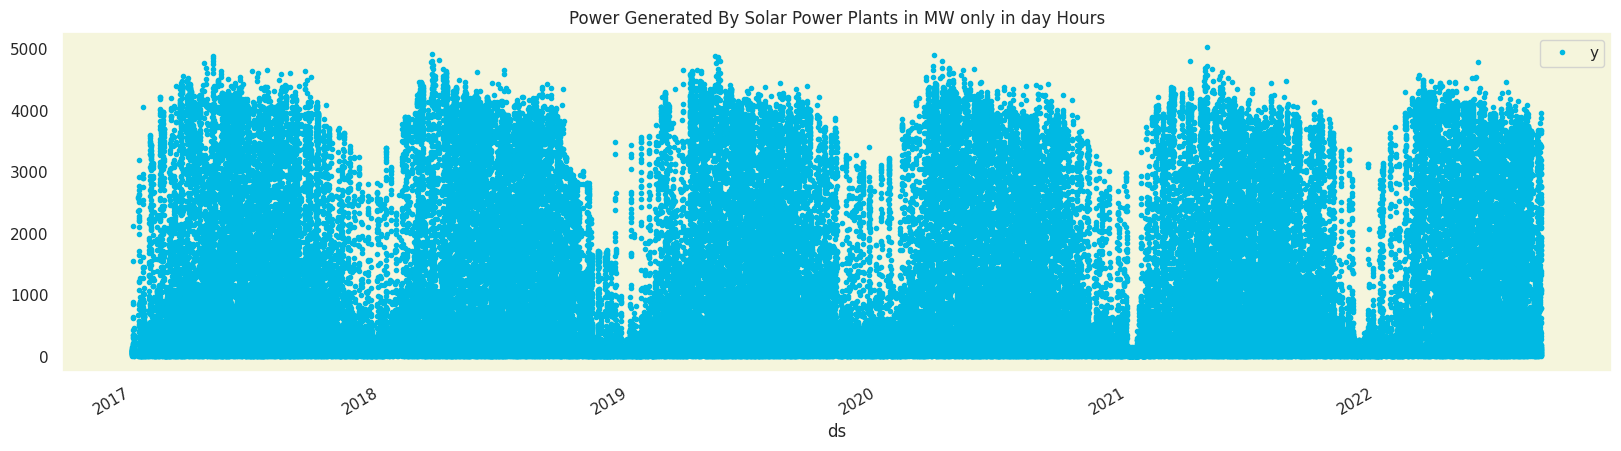

In [56]:
df5 = df_final[["ds","y"]]
df5.set_index("ds", inplace = True)

# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00","#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
df5.plot(style='.', figsize=(20,5), color=color_pal[5], title='Power Generated By Solar Power Plants in MW only in day Hours')
plt.ylim();
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp05nd_15s/zzuoiij4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05nd_15s/0xhcxfhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16703', 'data', 'file=/tmp/tmp05nd_15s/zzuoiij4.json', 'init=/tmp/tmp05nd_15s/0xhcxfhj.json', 'output', 'file=/tmp/tmp05nd_15s/prophet_modeli0mt4geg/prophet_model-20240606194129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:44:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


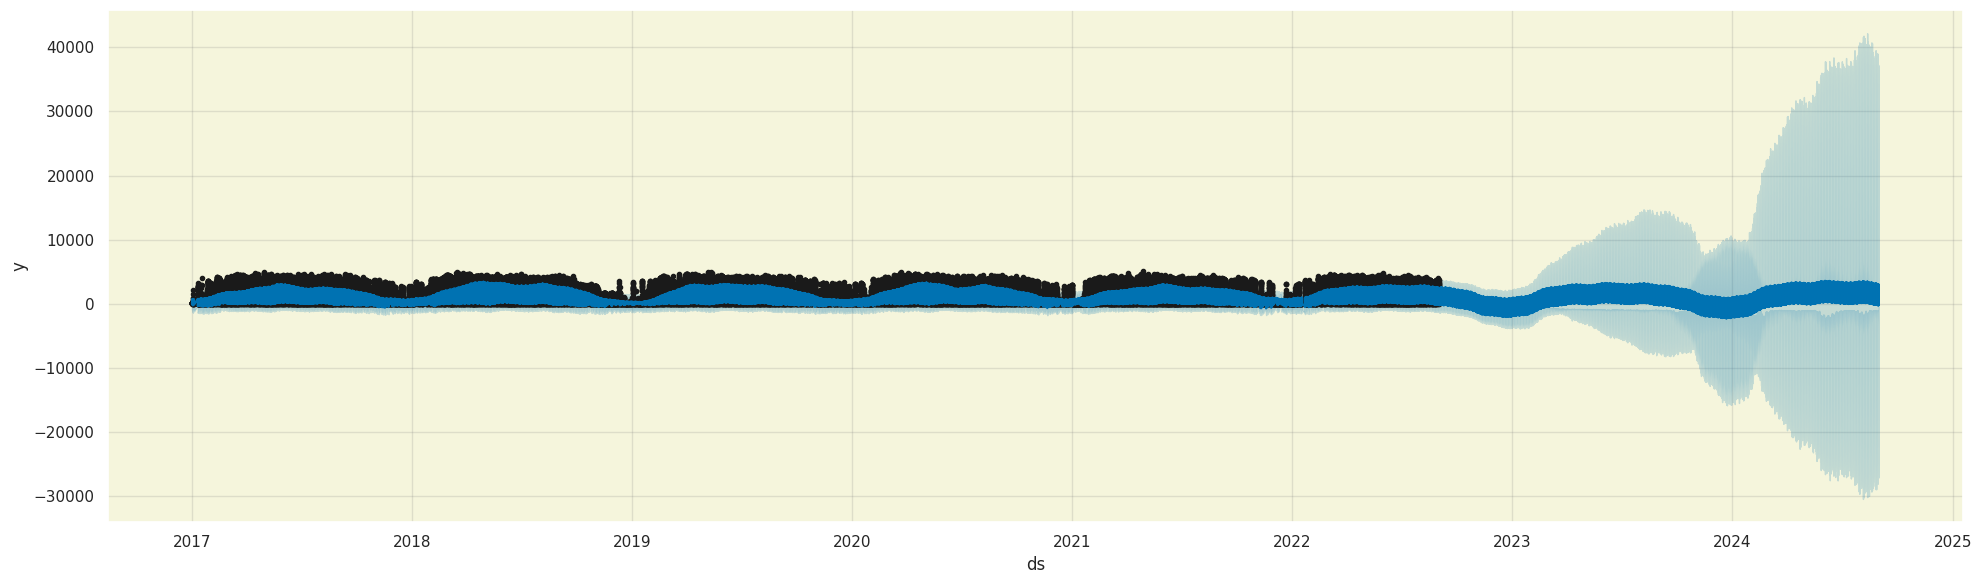

In [57]:
model = Prophet( daily_seasonality=True,
                 weekly_seasonality=True,
                 yearly_seasonality=True,
                 seasonality_mode='multiplicative',
                 changepoint_prior_scale=0.5,
                 holidays_prior_scale=0.1)

model.fit(df_final)

future = model.make_future_dataframe(periods=365*24*2,freq='H')
forecast = model.predict(future)
fig = model.plot(forecast,figsize=(20, 6))
plt.show()

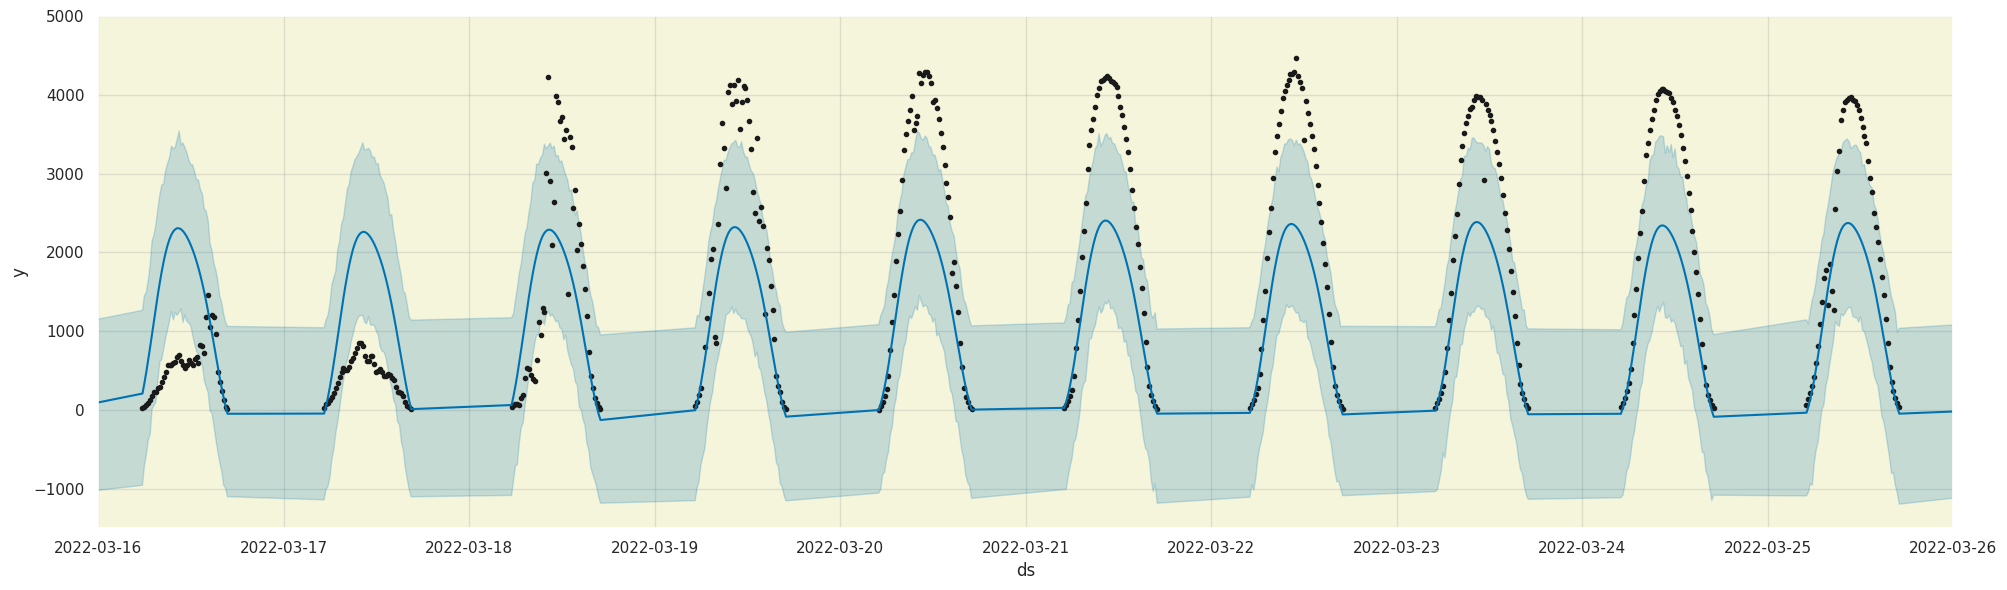

In [58]:
fig = model.plot(forecast,figsize=(20, 6))
plt.xlim(pd.to_datetime(['2022-03-16', '2022-03-26']))
plt.ylim(-1500,5000)
plt.show()

In [59]:
future2 = future[future['ds'] != 0]
future2.head()

ds
0 2017-01-01 08:00:00
1 2017-01-01 08:15:00
2 2017-01-01 08:30:00
3 2017-01-01 08:45:00
4 2017-01-01 09:00:00

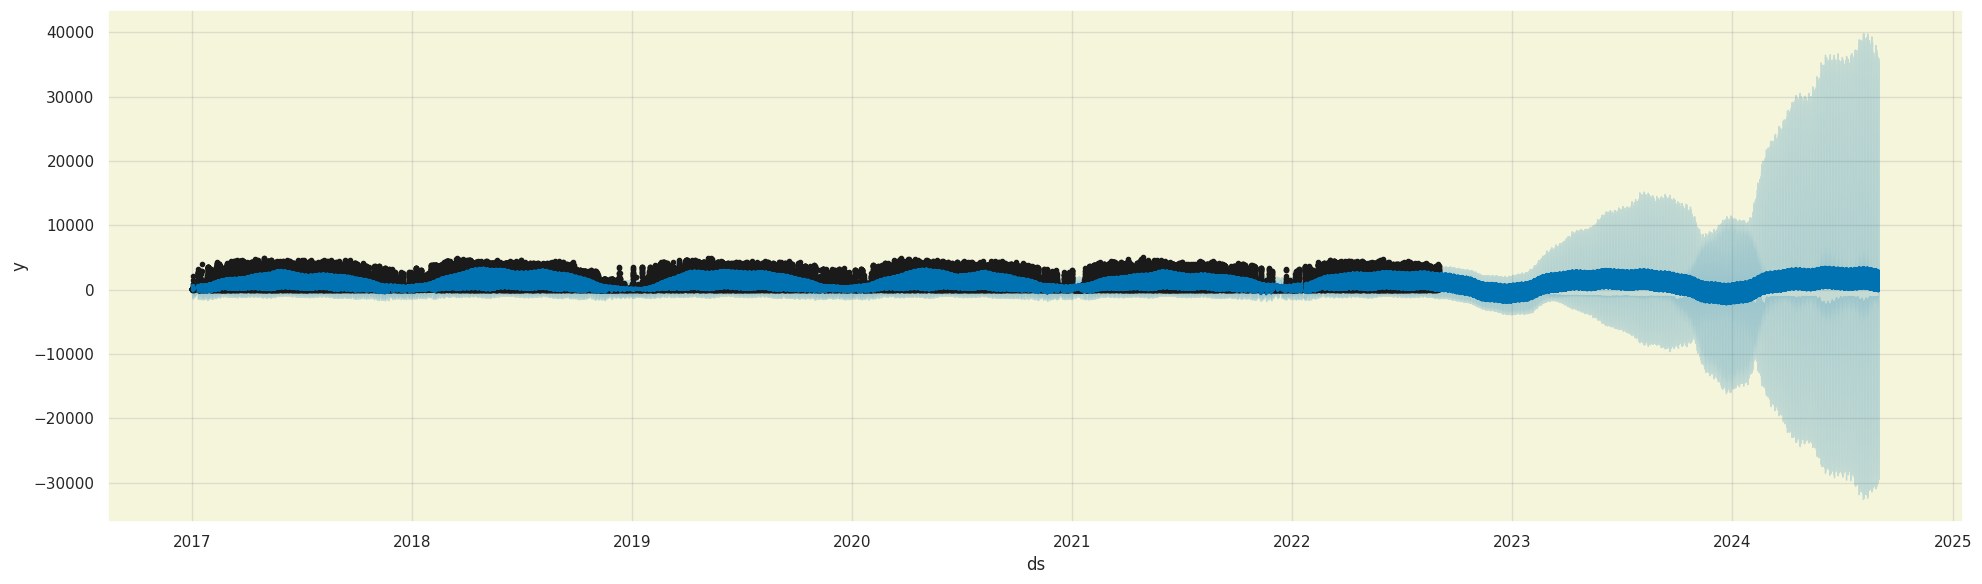

In [60]:
forecast2 = model.predict(future2)
fig = model.plot(forecast2,figsize=(20, 6))
plt.show()

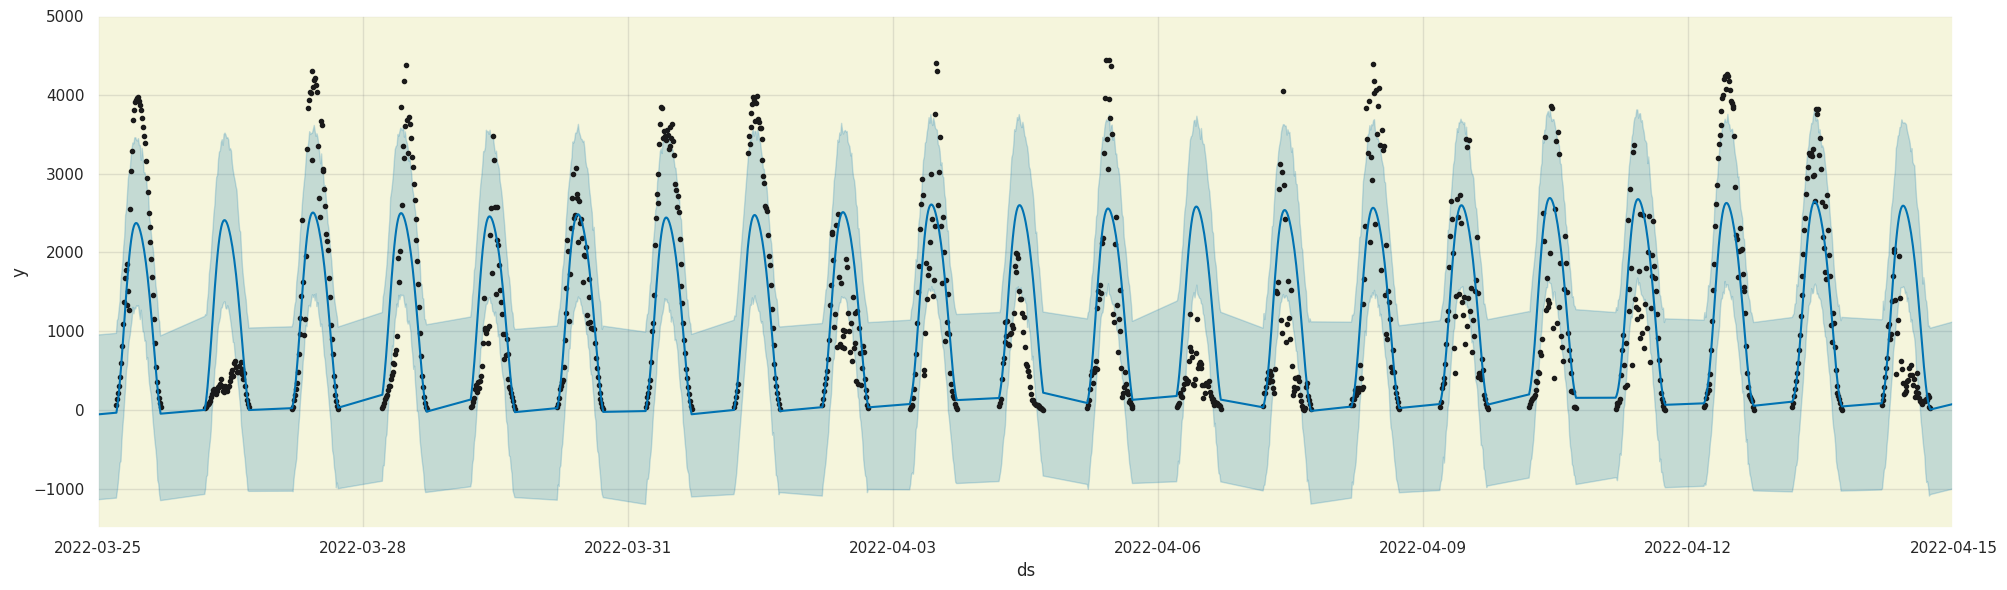

In [61]:
fig = model.plot(forecast2,figsize=(20, 6))
plt.xlim(pd.to_datetime(['2022-03-25', '2022-04-15']))
plt.ylim(-1500,5000)
plt.show()